In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing(use_latex=True)

In [2]:
# a
x, y = sp.symbols('x y')
# b
z = x + sp.I*y
# c
f = z**3 -1
# d
F = [sp.re(f), sp.im(f)]
# e
def jacobian(F):
    df_dx = sp.diff(f, x)
    df_dy = sp.diff(f, y)
    J = sp.Matrix([[sp.re(df_dx), sp.re(df_dy)], [sp.im(df_dx), sp.im(df_dy)]])
    return J

J = jacobian(F)
J


⎡                 2                    2                                      
⎢3⋅(re(x) - im(y))  - 3⋅(re(y) + im(x))     -6⋅(re(x) - im(y))⋅(re(y) + im(x))
⎢                                                                             
⎢                                                          2                  
⎣   6⋅(re(x) - im(y))⋅(re(y) + im(x))     3⋅(re(x) - im(y))  - 3⋅(re(y) + im(x

   ⎤
   ⎥
   ⎥
  2⎥
)) ⎦

In [3]:
#f
Fn = sp.lambdify([x, y], F)
Jn = sp.lambdify([x, y], J)

In [4]:
#g
def Newton(F, J, z0, tol=1e-7, maxiter=10000):
    z = z0
    for i in range(maxiter):
        j = J(z[0], z[1])
        Jinv = np.linalg.inv(j)
        Fz = F(z[0], z[1])
        if np.linalg.norm(Fz) < tol:
            return z
        z = z - Jinv.dot(Fz)
    return z

In [5]:
# h
print(Newton(Fn, Jn, np.array([0.5, 0.5])))

[-0.5        0.8660254]


In [6]:
# i
N = 50
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)




In [7]:
Fractal = np.zeros((N, N), np.int64)

def FractalConvergence(F, J, z0, tol=1e-7, maxiter=1000):
    z1 = Newton(F, J, z0)
    z2 = Newton(F, J, z1)
    for i in range(maxiter):
        j = J(z0[0], z0[1])
        Jinv = np.linalg.inv(j)
        Fz = F(z0[0], z0[1])
        if np.linalg.norm(Fz) < tol:
            return 20
    for i in range(maxiter):
        j = J(z1[0], z1[1])
        Jinv = np.linalg.inv(j)
        Fz = F(z1[0], z1[1])
        if np.linalg.norm(Fz) < tol:
            return 100
    for i in range(maxiter):
        j = J(z2[0], z2[1])
        Jinv = np.linalg.inv(j)
        Fz = F(z2[0], z2[1])
        if np.linalg.norm(Fz) < tol:
            return 255
    return 0


In [8]:
Z = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
Fractal = np.array([FractalConvergence(Fn, Jn, z) for z in Z]).reshape(N, N)


In [10]:
print(Fractal)

[[100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 ...
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]]


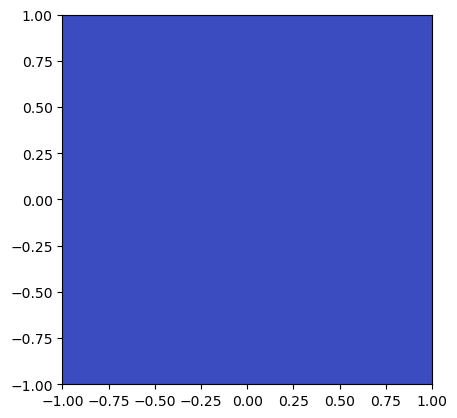

In [9]:
plt.imshow(Fractal, cmap='coolwarm' ,extent=[-1,1,-1,1])